In [1]:
import pandas
pandas.__version__

'1.4.3'

In [1]:
import quandl

QUANDL_API_KEY = 'uTRQ6d3gMeCBK5R7iWE4'  
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN')

In [4]:
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


In [5]:
df.tail()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2021-05-26,10.89,10.890,10.496,10.644,3447200.0,36676187.0
2021-05-27,10.60,10.980,10.584,10.902,3498258.0,38042273.0
2021-05-28,10.90,10.998,10.856,10.964,3001692.0,32847836.0
2021-05-31,11.00,11.030,10.920,10.920,1426676.0,15650390.0
2021-06-01,10.98,11.220,10.980,11.142,2689318.0,29976401.0


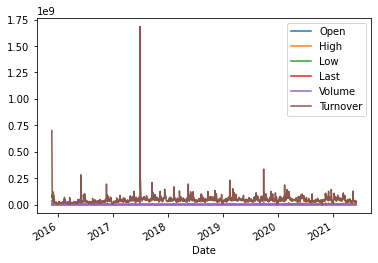

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot();

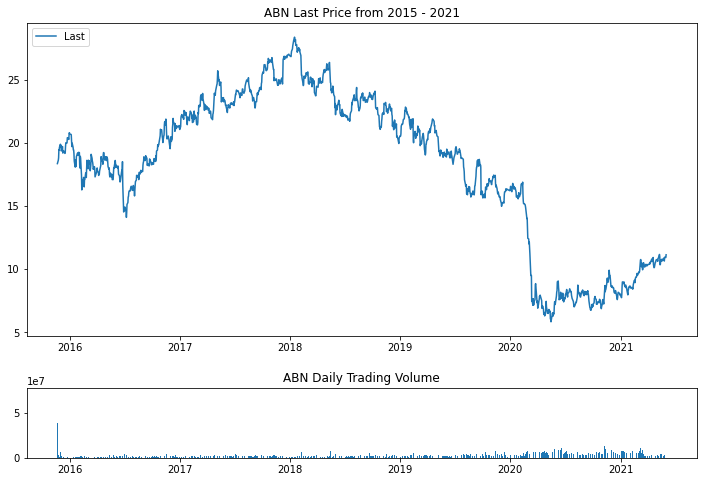

In [7]:
#Price and volume chart

#Top plot consisting of dailing closing prices
prices = df['Last']
volumes = df['Volume']
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label = 'Last')
plt.title('ABN Last Price from 2015 - 2021')
plt.legend(loc=2)

#Bottom plot of consisting daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan = 1, colspan = 4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Daily Trading Volume')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

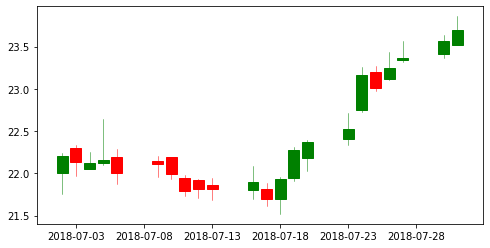

In [8]:
%matplotlib inline
import quandl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = QUANDL_API_KEY
df_subset = quandl.get('EURONEXT/ABN', 
                       start_date='2018-07-01', 
                       end_date='2018-07-31')

df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Last']]

figure, ax = plt.subplots(figsize = (8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, 
                 df_ohlc.values, 
                 width=0.8, 
                 colorup='green', 
                 colordown='red')
plt.show()

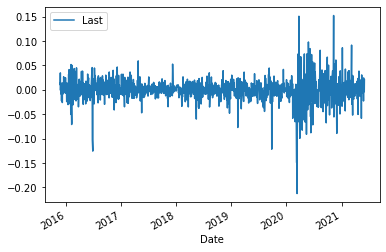

In [10]:
#Plotting the returns

%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods = 1)
daily_changes.plot();

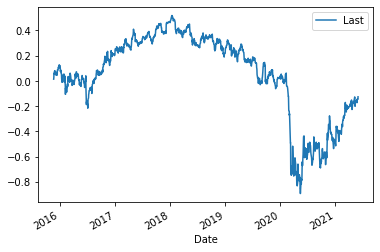

In [11]:
#Plotting cumalitive returns 
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

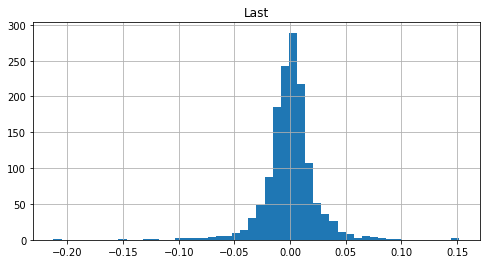

In [12]:
daily_changes.hist(bins=50, figsize=(8, 4));

In [13]:
daily_changes.describe()

,Last
count,1408.000000
mean,-0.000089
std,0.022877
min,-0.212453
25%,-0.009574
50%,0.000283
75%,0.009749
max,0.152042


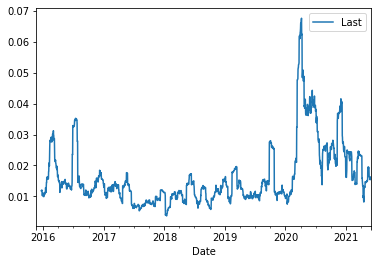

In [16]:
#Plotting volatility
df_filled = df.asfreq('D', method = 'ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window = 30, min_periods = 30).std()
df_std.plot();

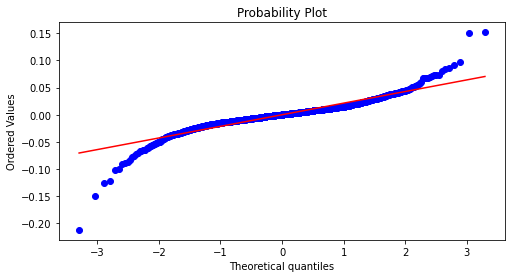

In [18]:
%matplotlib inline
import quandl
from scipy import stats
from scipy.stats import probplot

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1).dropna()

figure = plt.figure(figsize = (8,4))
ax = figure.add_subplot(111)
stats.probplot(daily_changes['Last'], dist = 'norm', plot = ax)
plt.show();

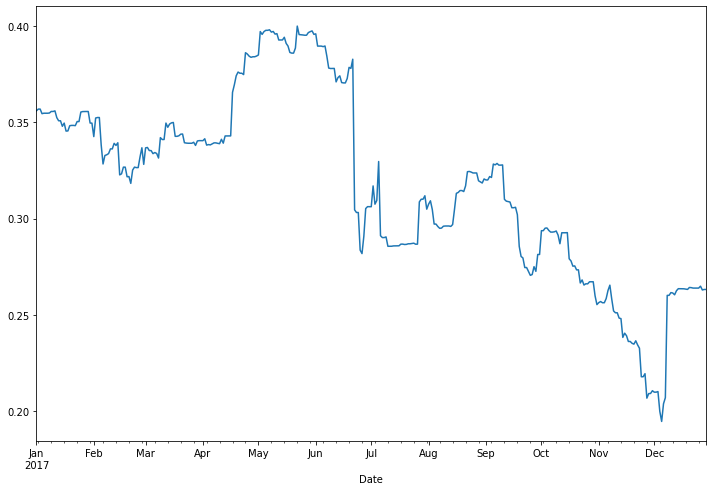

In [19]:
#Plotting Correlations
%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get(['EURONEXT/ABN.4', 'EURONEXT/SANTA.4'], 
                start_date='2016-01-01', 
                end_date='2017-12-31')

df_filled = df.asfreq('D', method='ffill')
daily_changes= df_filled.pct_change()
abn_returns = daily_changes['EURONEXT/ABN - Last']
santa_returns = daily_changes['EURONEXT/SANTA - Last']
window = int(len(df_filled.index)/2)
df_corrs = abn_returns\
    .rolling(window=window, min_periods=window)\
    .corr(other=santa_returns)\
    .dropna()
df_corrs.plot(figsize=(12, 8));

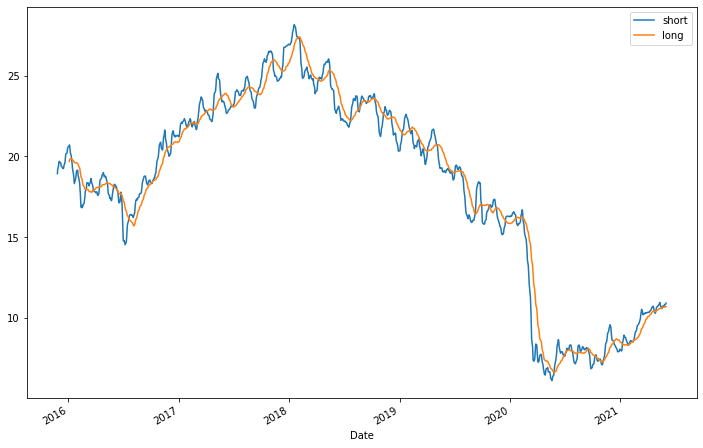

In [20]:
#Simple Moving Average
%matplotlib inline
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));

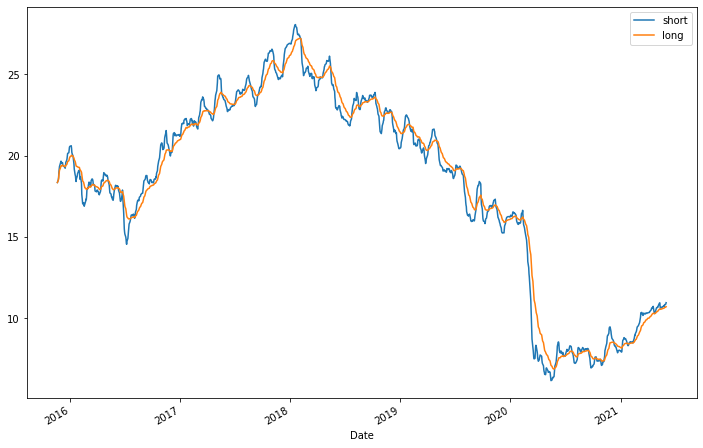

In [21]:
%matplotlib inline
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));